# Векторизация текста

## Мешок слов (BoW, bag of words)

Мешок слов - это такое представление текста, в котором важен не порядок слов в текстовом документе, а частота вхождения слова в этот документ.

Мешок слов можно представить в виде словаря, где ключ - это слово, а значение - частота вхождения слова в документ.

In [ ]:
text = "Greenpeace Франции совместно с другими НКО (Notre Affaire à Tous, Фонд Николя Юло и Oxfam France) требуют от властей возместить ущерб, причинённый гражданам страны из-за политики в области экологии и начать активные действия в рамках предыдущих соглашений. Соответствующий иск подали ещё два года назад из-за бездействия государства в решении проблемы климатического кризиса. Сегодня состоялось слушание дела в суде Парижа, решение по которому будет вынесено в течение двух недель. Хотя климатический кризис остаётся одной из главных проблем для французов (в 2020 году были побиты новые температурные рекорды), государство продолжает откладывать принятие необходимых мер. Выбросы парниковых газов в течение последних пяти лет продолжали снижаться вдвое медленнее, чем показатели, предусмотренные законом. В декабре прошлого года Высший совет по климату (независимый орган, созданный в 2018 году и состоящий из экспертов по климату) проанализировал, что две трети плана стимулирования не работают и, наоборот, могут способствовать увеличению выбросов. В Greenpeace Франции надеются, что суд признает обязанность государств бороться с климатическим кризисом — это подтверждает Хартия окружающей среды 2004 года  и Европейская конвенция о правах человека. «Такое решение было бы историческим и закрепило в законе, что борьба с изменением климата играет важную роль в защите основ ных прав граждан».Greenpeace France Кроме того, Greenpeace Франции ранее запустил петицию «Дело века», которую уже поддержало более двух миллионов граждан. «Климатический кризис оказывает серьёзное воздействие на жизнь каждого из нас: увеличение дней с экстремально высокой температурой приводит к повышению смертности людей по всему миру, растёт ареал распространения различных вирусов и инфекций. В России тоже остро стоит необходимость скорейшего начала технологической трансформации экономики в сторону климатически устойчивых технологий. Мы надеемся, что судебный процесс во Франции будет выигран людьми и станет примером в том числе и для нашего государства в вопросах важности срочного принятия мер по решению климатического кризиса», — прокомментировала руководительница энергетического отдела Greenpeace в России Елена Сакирко."

Будем считать, что в этом тексте предложения - это отдельные документы.

In [ ]:
text_docs = [sent.strip() for sent in text.split(".") if sent]
text_docs

['Greenpeace Франции совместно с другими НКО (Notre Affaire à Tous, Фонд Николя Юло и Oxfam France) требуют от властей возместить ущерб, причинённый гражданам страны из-за политики в области экологии и начать активные действия в рамках предыдущих соглашений',
 'Соответствующий иск подали ещё два года назад из-за бездействия государства в решении проблемы климатического кризиса',
 'Сегодня состоялось слушание дела в суде Парижа, решение по которому будет вынесено в течение двух недель',
 'Хотя климатический кризис остаётся одной из главных проблем для французов (в 2020 году были побиты новые температурные рекорды), государство продолжает откладывать принятие необходимых мер',
 'Выбросы парниковых газов в течение последних пяти лет продолжали снижаться вдвое медленнее, чем показатели, предусмотренные законом',
 'В декабре прошлого года Высший совет по климату (независимый орган, созданный в 2018 году и состоящий из экспертов по климату) проанализировал, что две трети плана стимулирования

Первым делом документы токенизируются.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# токенизируем каждое предложение
tokenized = [word_tokenize(sent) for sent in text_docs]

# удялаем пунктуацию и приводим к нижнему регистру
punct = string.punctuation + "—" + "«" + "»"
clean_text = [[token.lower() for token in tokens if token not in punct] for tokens in tokenized]

# удаляем стоп-слова
stopwords_list = stopwords.words("russian")
wout_sw = [[word for word in tokens if word not in stopwords_list] for tokens in clean_text]
[print(lst) for lst in wout_sw]

['greenpeace', 'франции', 'совместно', 'другими', 'нко', 'notre', 'affaire', 'à', 'tous', 'фонд', 'николя', 'юло', 'oxfam', 'france', 'требуют', 'властей', 'возместить', 'ущерб', 'причинённый', 'гражданам', 'страны', 'из-за', 'политики', 'области', 'экологии', 'начать', 'активные', 'действия', 'рамках', 'предыдущих', 'соглашений']
['соответствующий', 'иск', 'подали', 'ещё', 'года', 'назад', 'из-за', 'бездействия', 'государства', 'решении', 'проблемы', 'климатического', 'кризиса']
['сегодня', 'состоялось', 'слушание', 'дела', 'суде', 'парижа', 'решение', 'которому', 'вынесено', 'течение', 'двух', 'недель']
['хотя', 'климатический', 'кризис', 'остаётся', 'одной', 'главных', 'проблем', 'французов', '2020', 'году', 'побиты', 'новые', 'температурные', 'рекорды', 'государство', 'продолжает', 'откладывать', 'принятие', 'необходимых', 'мер']
['выбросы', 'парниковых', 'газов', 'течение', 'последних', 'пяти', 'лет', 'продолжали', 'снижаться', 'вдвое', 'медленнее', 'показатели', 'предусмотренные'

[None, None, None, None, None, None, None, None, None, None, None, None]

Далее составляется словарь уникальных токенов и подсчитывается количество вхождений каждого слова в документы.

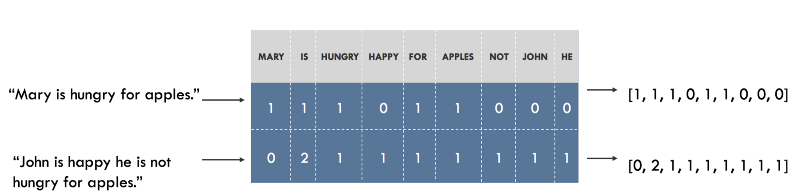

In [ ]:
dictionary = sorted(set([word for words in wout_sw for word in words]))
print(len(dictionary))
vectorized = []
for sent in wout_sw:
  vector = [sent.count(word) if word in sent else 0 for word in dictionary]
  vectorized.append(vector)
[print(vec) for vec in vectorized]

207
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0

[None, None, None, None, None, None, None, None, None, None, None, None]

С бинаризованным вектором работать всегда удобнее, поэтому можно рассматривать даже не количество вхождений токена в документ, а факт наличия токена в документе, т.е. 0 или 1, где 0 - если соответствующего токена нет в тексте, а 1 - если есть.

## Мешок n-грамм

Логичнее говорить не про мешок слов, а про мешок n-грамм, т.к. мешок слов сам по себе можно считать частным случаем мешка n-грамм при n=1.

### n-граммы

Самые мелкие структуры языка, с которыми мы работаем, называются **n-граммами**.
У n-граммы есть параметр n - количество слов, которые попадают в такое представление текста.
* Если n = 1 - то мы смотрим на то, сколько раз каждое слово встретилось в тексте. Получаем _униграммы_
* Если n = 2 - то мы смотрим на то, сколько раз каждая пара подряд идущих слов, встретилась в тексте. Получаем _биграммы_

Подсчитав количество этих n-грам в текстах, мы получим искомые численные представления.


<img src="https://drive.google.com/uc?id=1jHmkrGZTMawM46Yzxh243Ur1y5pYKzrl" 
alt="IMAGE ALT TEXT HERE" width="600" border="0" />

Так как результат не зависит от порядка слов в текстах, то говорят, что такая модель представления текстов в виде векторов получается из *гипотезы представления текста как мешка слов*.

In [ ]:
from nltk import ngrams

Прежде чем получать n-граммы, нужно разделить текст на токены (то есть сделать *токенизацию*) и, возможно, другие операции предобработки (lowercase, удаление пунктуации, стоп-слов). В предыдущем примере это уже сделано. Возьмем, например, 3-е токенизированное предложение.

In [ ]:
tokens = wout_sw[2]
tokens

['сегодня',
 'состоялось',
 'слушание',
 'дела',
 'суде',
 'парижа',
 'решение',
 'которому',
 'вынесено',
 'течение',
 'двух',
 'недель']

In [ ]:
list(ngrams(tokens, 1)) # униграммы

[('сегодня',),
 ('состоялось',),
 ('слушание',),
 ('дела',),
 ('суде',),
 ('парижа',),
 ('решение',),
 ('которому',),
 ('вынесено',),
 ('течение',),
 ('двух',),
 ('недель',)]

In [ ]:
list(ngrams(tokens, 2)) # биграммы

[('сегодня', 'состоялось'),
 ('состоялось', 'слушание'),
 ('слушание', 'дела'),
 ('дела', 'суде'),
 ('суде', 'парижа'),
 ('парижа', 'решение'),
 ('решение', 'которому'),
 ('которому', 'вынесено'),
 ('вынесено', 'течение'),
 ('течение', 'двух'),
 ('двух', 'недель')]

In [ ]:
list(ngrams(tokens, 3)) # триграммы

[('сегодня', 'состоялось', 'слушание'),
 ('состоялось', 'слушание', 'дела'),
 ('слушание', 'дела', 'суде'),
 ('дела', 'суде', 'парижа'),
 ('суде', 'парижа', 'решение'),
 ('парижа', 'решение', 'которому'),
 ('решение', 'которому', 'вынесено'),
 ('которому', 'вынесено', 'течение'),
 ('вынесено', 'течение', 'двух'),
 ('течение', 'двух', 'недель')]

In [ ]:
list(ngrams(tokens, 5)) # ... пентаграммы

[('сегодня', 'состоялось', 'слушание', 'дела', 'суде'),
 ('состоялось', 'слушание', 'дела', 'суде', 'парижа'),
 ('слушание', 'дела', 'суде', 'парижа', 'решение'),
 ('дела', 'суде', 'парижа', 'решение', 'которому'),
 ('суде', 'парижа', 'решение', 'которому', 'вынесено'),
 ('парижа', 'решение', 'которому', 'вынесено', 'течение'),
 ('решение', 'которому', 'вынесено', 'течение', 'двух'),
 ('которому', 'вынесено', 'течение', 'двух', 'недель')]

Можно построить векторы вручную, можно воспользоваться решением из **sklearn**.

Объект `CountVectorizer` делает следующую вещь:
* строит для каждого документа (каждой пришедшей ему строки) вектор размерности `n`, где `n` -- количество слов или n-грам во всём корпусе
* заполняет каждый i-тый элемент количеством вхождений слова в данный документ

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1, 3), stop_words=stopwords_list)
vectorized = vectorizer.fit_transform(text_docs)
print(vectorizer.get_feature_names())
print(vectorized.toarray())

['2004', '2004 года', '2004 года европейская', '2018', '2018 году', '2018 году состоящий', '2020', '2020 году', '2020 году побиты', 'affaire', 'affaire tous', 'affaire tous фонд', 'france', 'france кроме', 'france кроме greenpeace', 'france требуют', 'france требуют властей', 'greenpeace', 'greenpeace france', 'greenpeace france кроме', 'greenpeace россии', 'greenpeace россии елена', 'greenpeace франции', 'greenpeace франции надеются', 'greenpeace франции ранее', 'greenpeace франции совместно', 'notre', 'notre affaire', 'notre affaire tous', 'oxfam', 'oxfam france', 'oxfam france требуют', 'tous', 'tous фонд', 'tous фонд николя', 'активные', 'активные действия', 'активные действия рамках', 'ареал', 'ареал распространения', 'ареал распространения различных', 'бездействия', 'бездействия государства', 'бездействия государства решении', 'бороться', 'бороться климатическим', 'бороться климатическим кризисом', 'борьба', 'борьба изменением', 'борьба изменением климата', 'важности', 'важности 

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(vectorized.toarray())
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620
0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
6,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,2,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words=stopwords_list)
vectorized = vectorizer.fit_transform(text_docs)
df = pd.DataFrame(vectorized.toarray())
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204
0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,...,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Мешок символьных n-gram

В некоторых задачах в качестве признаков могут быть использованы n-граммы символов. Для этого необходимо установить в ```CountVectorizer()``` параметр ```analyzer = 'char'```, то есть анализировать символы.

In [ ]:
# инициализируем векторайзер для символов
char_vectorizer = CountVectorizer(analyzer='char', ngram_range=(3, 8))

# обучаем его и сразу применяем к x_train
char_vectorized = char_vectorizer.fit_transform(text_docs)

print(char_vectorizer.get_feature_names())

[' (n', ' (no', ' (not', ' (notr', ' (notre', ' (notre ', ' (в', ' (в ', ' (в 2', ' (в 20', ' (в 202', ' (в 2020', ' (н', ' (не', ' (нез', ' (неза', ' (незав', ' (незави', ' 20', ' 200', ' 2004', ' 2004 ', ' 2004 г', ' 2004 го', ' 201', ' 2018', ' 2018 ', ' 2018 г', ' 2018 го', ' 202', ' 2020', ' 2020 ', ' 2020 г', ' 2020 го', ' af', ' aff', ' affa', ' affai', ' affair', ' affaire', ' fr', ' fra', ' fran', ' franc', ' france', ' france ', ' france)', ' gr', ' gre', ' gree', ' green', ' greenp', ' greenpe', ' ox', ' oxf', ' oxfa', ' oxfam', ' oxfam ', ' oxfam f', ' to', ' tou', ' tous', ' tous,', ' tous, ', ' tous, ф', ' «д', ' «де', ' «дел', ' «дело', ' «дело ', ' «дело в', ' à ', ' à t', ' à to', ' à tou', ' à tous', ' à tous,', ' ак', ' акт', ' акти', ' актив', ' активн', ' активны', ' ар', ' аре', ' ареа', ' ареал', ' ареал ', ' ареал р', ' бе', ' без', ' безд', ' безде', ' бездей', ' бездейс', ' бо', ' бол', ' боле', ' более', ' более ', ' более д', ' бор', ' боро', ' борот', ' бор

In [ ]:
df = pd.DataFrame(char_vectorized.toarray())
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,10345,10346,10347,10348,10349,10350,10351,10352,10353,10354,10355,10356,10357,10358,10359,10360,10361,10362,10363,10364,10365,10366,10367,10368,10369,10370,10371,10372,10373,10374,10375,10376,10377,10378,10379,10380,10381,10382,10383,10384
0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Cимвольные n-граммы используются, например, для задачи определения языка. Ещё одна замечательная особенность признаков-символов - для них не нужна токенизация и лемматизация, можно использовать такой подход для языков, у которых нет готовых анализаторов.

## TF-IDF векторизация

`TfidfVectorizer` делает то же, что и `CountVectorizer`, но в качестве значений выдает **tf-idf** каждого слова.

Как считается tf-idf:

**TF (term frequency)** – относительная частотность слова в документе:
$$ TF(t,d) = \frac{n_{t}}{\sum_k n_{k}} $$

**IDF (inverse document frequency)** – обратная частота документов, в которых есть это слово:
$$ IDF(t, D) = \mbox{log} \frac{|D|}{|{d : t \in d}|} $$

Перемножаем их:
$$TFIDF(t, d, D) = TF(t,d) \times IDF(i, D)$$

Cмысл: если слово часто встречается в одном документе, но в целом по корпусу встречается в небольшом 
количестве документов, у него высокий TF-IDF.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

Действуем аналогично, как с ```CountVectorizer()```:

In [ ]:
# инициализируем векторизатор
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 4), max_df=0.95, min_df=2, stop_words=stopwords_list)

Здесь *max_df* - максимальная доля слов в документе, читается так: если слова встречается более чем в 95% документов, его игнорируем. Делается это, чтобы отсеять слова, специфичные для конкретного корпуса. *min_df* показывает минимальную частоту вхождения слова в документы, т.е. слова, которые встречаеются менее 5 раз, игнорируются. Если значение *max_df* и *min_df* заданы целым числом, то это количество слов, если вещественным - доля.

In [ ]:
tfidf_vectorized = tfidf_vectorizer.fit_transform(text_docs)

print(tfidf_vectorizer.get_feature_names())

['france', 'greenpeace', 'greenpeace франции', 'года', 'году', 'государства', 'граждан', 'двух', 'климатический', 'климатический кризис', 'климатического', 'климатического кризиса', 'кризис', 'кризиса', 'мер', 'решение', 'россии', 'течение', 'франции']


In [ ]:
df = pd.DataFrame(tfidf_vectorized.toarray())
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.573762,0.454925,0.506837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.454925
1,0.000000,0.000000,0.000000,0.404024,0.000000,0.457374,0.000000,0.000000,0.000000,0.000000,0.457374,0.457374,0.000000,0.457374,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.577350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.577350,0.000000,0.57735,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.447214,0.000000,0.000000,0.000000,0.447214,0.447214,0.000000,0.000000,0.447214,0.000000,0.447214,0.000000,0.000000,0.00000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
5,0.000000,0.000000,0.000000,0.662044,0.749465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
6,0.000000,0.472325,0.526222,0.526222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.472325
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.00000,0.000000
8,0.380044,0.602659,0.335714,0.000000,0.000000,0.000000,0.380044,0.380044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.301329
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.577350,0.577350,0.000000,0.000000,0.577350,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


### Оценка качества классификациии


**Полнота** (Sensitivity, True Positive Rate, Recall, Hit Rate) отражает процент найденных классфикатором объектов, принадлежащих классу, относительно всех объектов этого класса в тестовой выборке.

**Точность** (Precision, Positive Predictive Value) отражает процент действительно принадлежащих данному классу объектов относительно всех объектов, которые классификатор отнес к этому классу. (Не путать с Accuracy!)

**Accuracy** показывает процент объектов, по которым классификатор принял правильное решение.

Легко построить алгоритм со 100%-й полнотой: он все объекты относит к классу 1, но при этом точность может быть очень низкой. Нетрудно построить алгоритм с близкой к 100% точностью: он относит к классу 1 только те объекты, в которых уверен, при этом полнота может быть низкая.

**F1-мера** (F1 score) является средним гармоническим точности и полноты, максимизация этого функционала приводит к одновременной максимизации этих двух «ортогональных критериев»

$$F_1 = \frac{2}{\mathrm{recall}^{-1} + \mathrm{precision}^{-1}} = 2 \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{\mathrm{precision} + \mathrm{recall}} = \frac{\mathrm{tp}}{\mathrm{tp} + \frac12 (\mathrm{fp} + \mathrm{fn}) } $$

Также рассматривают весовое среднее гармоническое точности и полноты –  $F_\beta$-меру:

$$F_\beta = (1 + \beta^2) \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{(\beta^2 \cdot \mathrm{precision}) + \mathrm{recall}} = \frac {(1 + \beta^2) \cdot \mathrm{tp} }{(1 + \beta^2) \cdot \mathrm{tp} + \beta^2 \cdot \mathrm{fn} + \mathrm{fp}}\,$$

Изменение $\beta$ позволяет делать один из критериев (точность или полноту) важнее при оптимизации.